<a href="https://colab.research.google.com/github/yul-codes/DA_homework/blob/main/AB_hw3_Kuznetsova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color='purple'>*Задание*</font>

- Подключитесь к данным через python.

- Посмотрите, что это за данные.

- Постройте гистограмму для каждого кейса.

- Предложите метрику, за которой вы могли бы следить в каждом случае.

- К какому дата сету вы бы могли применить t-тест? Сделайте проверку на python аналогично тому, что делали в классе.

- К какому дата сету вы бы применили z-test? Почему?

- К какому вы бы не стали применять t-test и z-test? Объясните почему и покажите это. Что тогда лучше использовать для таких данных?

Домашнее задание присылайте ввиде питоновского файла.



##<font color='purple'>*Решение*</font>

###<font color='purple'>*Подключение к данным и их обзор*</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

In [ ]:
# аутентификация в google colab
from google.colab import auth
auth.authenticate_user()

# получение login data и авторизация в gspread для получения доступа к файлам на гугл диске
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# создание pandas dataframes из гугл-таблицы
url = 'https://docs.google.com/spreadsheets/d/1SX8irgV3d4p9TXEoFm2TjbuBnQDudeYbwa6yestH-E8/edit?usp=sharing'

tab_1 = gc.open_by_url(url).worksheet('1').get_all_values()
tab_2 = gc.open_by_url(url).worksheet('2').get_all_values()
tab_3 = gc.open_by_url(url).worksheet('3').get_all_values()


df_1 = pd.DataFrame(tab_1[1:], columns=tab_1[0])
df_2 = pd.DataFrame(tab_2[1:], columns=tab_2[0])
df_3 = pd.DataFrame(tab_3[1:], columns=tab_3[0])

<font color='teal'>**Рассмотрим структуру первого датафрейма и тип данных столбцов**</font>

In [ ]:
df_1

,user_id,CREDIT
0,1483,125 000
1,1471,100 000
2,1257,75 000
3,1485,100 000
4,1418,150 000
...,...,...
1655,1015,25 000
1656,1311,150 000
1657,1106,50 000
1658,1027,100 000


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  1660 non-null   object
 1   CREDIT   1660 non-null   object
dtypes: object(2)
memory usage: 26.1+ KB


<font color='teal'>Датасет предположительно представляет собой набор данных о сумме кредитов, выданных пользователям.

Конвертируем данные. Идентификаторы ползователя представляют собой количественный дискретный тип данных, преобразуем в целые числа. Несмотря на то, что судя по выгрузке суммы кредитов указаны как целые числа, концептуально они относятся к количественному непрерывному типу данных. Удалим пробелы и преобразуем во float.</font>

***
<font color='teal'>Встретилась такая ошибка:</font>

     ValueError: could not convert string to float: '125\xa0000'

<font color='teal'>\xa0 - неразрывный пробел, добавляем его в код для его корректной работы.</font>

In [ ]:
df_1['user_id'] = df_1['user_id'].astype(int)
df_1['CREDIT'] = df_1['CREDIT'].apply(lambda x: re.sub(r'[\s\xa0]', '', x)).astype(float)

<font color='teal'>**Рассмотрим второй датасет**</font>

In [ ]:
df_2

,№,amount
0,1,150
1,2,220
2,3,150
3,4,220
4,5,150
...,...,...
1036,1037,12000
1037,1038,180
1038,1039,180
1039,1040,220


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   №       1041 non-null   object
 1   amount  1041 non-null   object
dtypes: object(2)
memory usage: 16.4+ KB


<font color='teal'>Датасет предположительно представляет собой информацию о номере операции (транзакции?) и ее сумме.

Конвертируем данные. Номер преобразуем в целое число (дискретный тип данных), сумму - во float (непрерывный тип данных). Для колонки <font color='black'>`amount`</font> перед преобразованием приведем данные в необходимый для преобразования вид без кавычек аналогично первому датасету. Изменим название колонки <font color='black'>`№`</font>, чтобы не менять при написании кода английскую раскладку.</font>

In [ ]:
df_2.rename(columns={'№': 'no'}, inplace=True)

df_2['no'] = df_2['no'].astype(int)
df_2['amount'] = df_2['amount'].apply(lambda x: re.sub(r'[\s\xa0]', '', x)).astype(float)

<font color='teal'>**Рассмотрим третий датасет**</font>

In [ ]:
df_3

,uid,time_reg,time_come,type
0,4912391821,22.01.2023 13:13,01.03.2023 16:00,ios
1,4912391827,28.01.2023 15:29,01.03.2023 16:01,android
2,4912391971,12.01.2023 0:06,01.03.2023 16:00,ios
3,4912392018,15.01.2023 12:19,01.01.2000 0:00,ios
4,4912392093,12.01.2023 18:15,01.01.2000 0:00,android
...,...,...,...,...
7562,4912937247,22.01.2023 11:14,01.03.2023 16:00,android
7563,4912937391,23.01.2023 3:47,01.03.2023 16:01,android
7564,4912937452,12.01.2023 9:57,01.01.2000 0:00,android
7565,4912937464,08.01.2023 12:16,01.01.2000 0:00,android


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        7567 non-null   object
 1   time_reg   7567 non-null   object
 2   time_come  7567 non-null   object
 3   type       7567 non-null   object
dtypes: object(4)
memory usage: 236.6+ KB


<font color='teal'>Датасет представляет собой информацию об идентификаторе пользователей, дате и времени их регистрации в системе (на сайте, в приложении и т.п.), дате дальнейшего (последнего?) входа в систему, а также устройстве, с которого был совершен вход при регистрации или позднее.

Конвертируем данные. Номер id преобразуем в целое число (дискретный тип данных), даты регистрации и входа - в формат datetime, тип устройства - в категориальный тип данных.</font>

In [ ]:
df_3['uid'] = df_3['uid'].astype(int)
df_3['type'] = df_3['type'].astype('category')
df_3['time_reg'] = pd.to_datetime(df_3['time_reg'], format='%d.%m.%Y %H:%M')
df_3['time_come'] = pd.to_datetime(df_3['time_come'], format='%d.%m.%Y %H:%M')

In [ ]:
df_3

,uid,time_reg,time_come,type
0,4912391821,2023-01-22 13:13:00,2023-03-01 16:00:00,ios
1,4912391827,2023-01-28 15:29:00,2023-03-01 16:01:00,android
2,4912391971,2023-01-12 00:06:00,2023-03-01 16:00:00,ios
3,4912392018,2023-01-15 12:19:00,2000-01-01 00:00:00,ios
4,4912392093,2023-01-12 18:15:00,2000-01-01 00:00:00,android
...,...,...,...,...
7562,4912937247,2023-01-22 11:14:00,2023-03-01 16:00:00,android
7563,4912937391,2023-01-23 03:47:00,2023-03-01 16:01:00,android
7564,4912937452,2023-01-12 09:57:00,2000-01-01 00:00:00,android
7565,4912937464,2023-01-08 12:16:00,2000-01-01 00:00:00,android


<font color='teal'>Стоит отменить, что в столбце <font color='black'>`time_сome`</font> есть подозрительное повторяющееся значение <font color='black'>`01.01.2000 0:00`</font>, судя по всему, наличие таких "дефолтных" даты и времени может говорить о том, что пользователь после регистрации до настоящего времени больше не совершал вход. Судя по проверке, таких пользователей насчитывается 5270.</font>

In [ ]:
df_3[df_3['time_come'] == '2000-01-01 00:00:00'].shape[0]

5270

<font color='teal'>Также можно в начале проверить (а вдруг), существуют ли записи о пользователях с упоминанием обоих типов устройств. Судя по проверке ниже, таких нет.</font>

In [ ]:
andr_uids = set(df_3[df_3['type'] == 'android']['uid'])
ios_uids = set(df_3[df_3['type'] == 'ios']['uid'])

both_uids = andr_uids.intersection(ios_uids)

In [ ]:
print(f'{andr_uids}\n\n{ios_uids}\n\n{both_uids}')

{4912742400, 4912422914, 4912472066, 4912406534, 4912726023, 4912472073, 4912734218, 4912439307, 4912832522, 4912619533, 4912914448, 4912422929, 4912529425, 4912685076, 4912594965, 4912758806, 4912791574, 4912734233, 4912431130, 4912554011, 4912848926, 4912668705, 4912644130, 4912685090, 4912775201, 4912627749, 4912414758, 4912406567, 4912635942, 4912848937, 4912873512, 4912472107, 4912480299, 4912562222, 4912554037, 4912455735, 4912775225, 4912472123, 4912422976, 4912889928, 4912922699, 4912922700, 4912709709, 4912840781, 4912496719, 4912414800, 4912603216, 4912635985, 4912668755, 4912767055, 4912767056, 4912808017, 4912848978, 4912873560, 4912529498, 4912832602, 4912423004, 4912652380, 4912586846, 4912717917, 4912750691, 4912824420, 4912930915, 4912693350, 4912742504, 4912529513, 4912537709, 4912685165, 4912676975, 4912717937, 4912447602, 4912685171, 4912791672, 4912898168, 4912824443, 4912488572, 4912603261, 4912922753, 4912398466, 4912619650, 4912799874, 4912570502, 4912701575, 491

###<font color='purple'>*Построение гистограмм*</font>

<font color='teal'>Построим графики распределения сумм выданных кредитов из первого датафрейма и распределения сумм операций из второго датасета.</font>

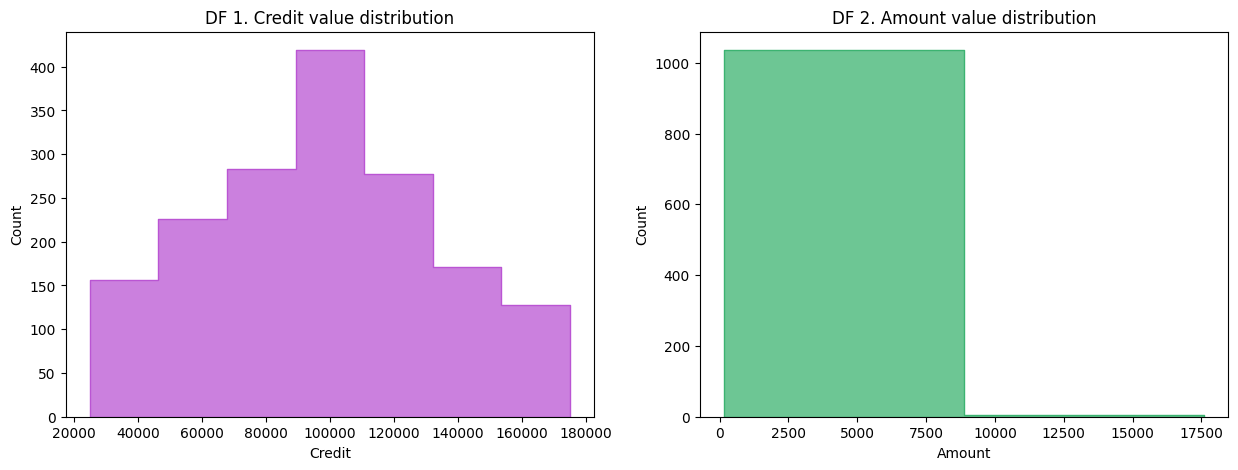

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_1['CREDIT'], bins=7, element='step', color='mediumorchid', ax=ax[0])
ax[0].set_title('DF 1. Credit value distribution')
ax[0].set_xlabel('Credit')
ax[0].set_ylabel('Count')

sns.histplot(df_2['amount'], bins=2, element='step', color='mediumseagreen', ax=ax[1])
ax[1].set_title('DF 2. Amount value distribution')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Count')

plt.show()

<font color='teal'>В Plotly, судя по всему, есть свои алгоритмы для выстраивания гистограмм, пока что мне не до конца понятные, но из-за них графики принимают несколько иной вид, нежели в Matplotlib и Seaborn, при том же значении bins/nbinsx. Но интерактивные графики, тем не менее, прекрасны =)</font>

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('DF 1. Credit value distribution', 'DF 2. Amount value distribution'))

fig.add_trace(go.Histogram(x=df_1['CREDIT'], nbinsx=7, name='', marker_color='mediumorchid'), row=1, col=1)

fig.add_trace(go.Histogram(x=df_2['amount'], nbinsx=2, name='', marker_color='mediumseagreen'), row=1, col=2)

fig.update_xaxes(title_text='Credit', row=1, col=1)
fig.update_xaxes(title_text='Amount', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()

<font color='teal'>Понять, какие графики можно было бы построить для третьего датасета, оказалось задачей чуть более сложной, поскольку непосредственно числовых данных там нет.

Можно построить график, показывающий сколько пользователей используют каждый тип устройств. Также можно построить график распределения времени регистрации на сайте (не знаю, чем это поможет, но все же). Еще можно построить график для данных в столбцу с датой и временем входа. По моей гипотезе, "дефолтная" дата 2000 года означает, что повторного входа не было, так можно отследить, сколько пользователей повторили вход, а сколько нет.</font>

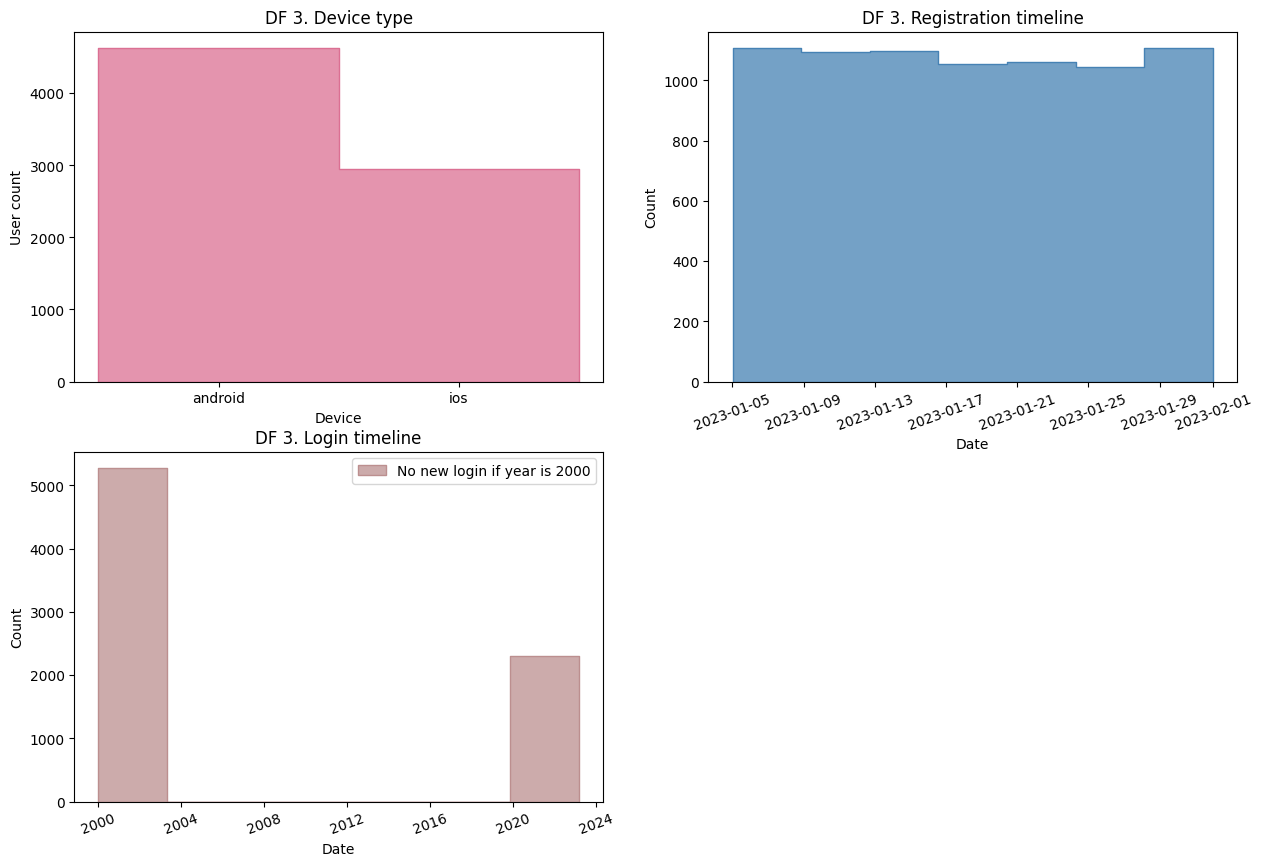

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df_3['type'], bins=7, element='step', color='palevioletred', ax=ax[0, 0])
ax[0][0].set_title('DF 3. Device type')
ax[0][0].set_xlabel('Device')
ax[0][0].set_ylabel('User count')

sns.histplot(df_3['time_reg'], bins=7, element='step', color='steelblue', ax=ax[0, 1])
ax[0][1].set_title('DF 3. Registration timeline')
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Count')
ax[0][1].tick_params(axis='x', labelrotation=20)

sns.histplot(df_3['time_come'], bins=7, element='step', color='rosybrown', ax=ax[1, 0])
ax[1][0].set_title('DF 3. Login timeline')
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Count')
ax[1][0].tick_params(axis='x', labelrotation=20)
ax[1][0].legend(['No new login if year is 2000'], loc='upper right')

ax[1][1].set_visible(False)

plt.show()

###<font color='purple'>*Возможные метрики для каждого кейса*</font>

* <font color='teal'>Датасет 1: можно рассмотреть среднее значение суммы выданных кредитов или  в целом общее количество выданных кредитов. Если бы датасет содержал в себе данные о дате выдачи, можно было бы отследить сезонность, например, в какой день кредиты выдаются чаще или в большем объеме.</font>

* <font color='teal'>Датасет 2: средняя сумма операций/транзакций, общий оборот операций. Если бы были данные о датах, можно было бы рассмотреть средний и общий объем сумм и количества операций по дням.</font>

* <font color='teal'>Датасет 3: удержание пользователей - retention rate - на основании данных о повторном входе после регистрации; удержание ползователей по двум независимым группам - разные типы устройств (как показывает личный опыт, удобство и доработка одного и того же софта может находиться на очень разном уровне на разных платформах). При большем количестве данных можно было бы посмотреть временной промежуток между регистрацией и следующими логинами, это помогло бы понять, насколько активно пользуются приложением/сайтом.</font>



###<font color='purple'>*К какому дата сету вы бы могли применить t-тест?*</font>

<font color='teal'>T-тест можно применить к первому датасету - в нем распределение размеров выданных кредитов судя по гистограмме выглядит близким к нормальному, а значит и выборочное среднее должно быть распределено нормально.

Тем не менее, выполним проверку на "нормальность" распределения выборочного среднего.</font>

In [ ]:
# применяем bootstrap
n = 1000
result = []
for i in range(n):
    mean = df_1['CREDIT'].sample(frac=1,replace=True,random_state=i).mean()
    result.append(mean)

In [ ]:
t = pd.DataFrame({'sample_mean':result})

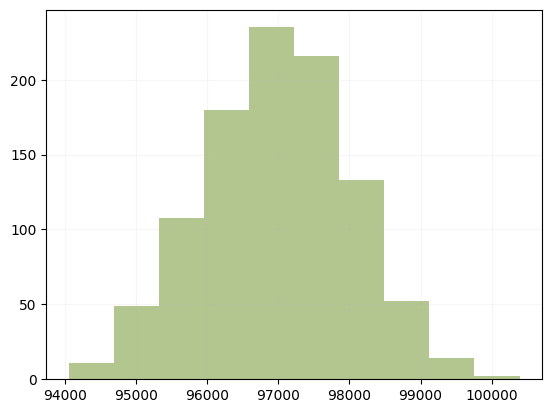

In [ ]:
# распределение выборочных средних
plt.figure()

t['sample_mean'].hist(color='olivedrab', alpha=0.5)

plt.grid(alpha=0.1)
plt.show()

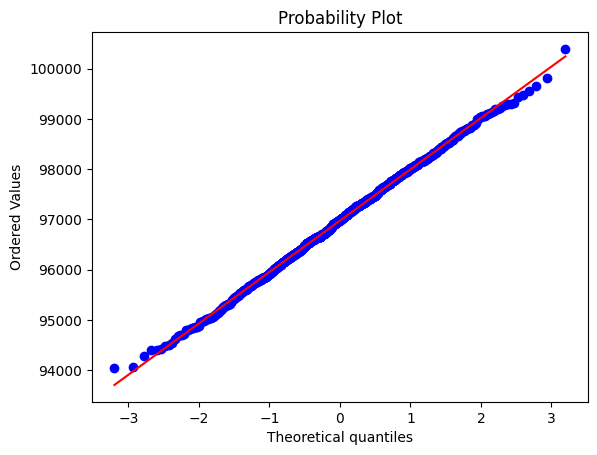

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(t['sample_mean'], dist="norm", plot=pylab)
pylab.show()

<font color='teal'>Распределение выборочного среднего на гистограмме и qq-плоте выглядит адекватно для нормального распределения, что доказывает, что можно проводить т-тест. Нулевая гипотеза - средние значения суммы кредитов в двух подвыборках будут равны. Уровень значимость $alpha = 0.05$.</font>

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# генерация подвыборок из имеющегося датасета
a = df_1['CREDIT'].sample(frac=1,replace=True,random_state=0)

b = df_1['CREDIT'].sample(frac=1,replace=True,random_state=1)

In [ ]:
# т-тест для двусторонней альтернативы
ttest_ind(a,b,equal_var=False,alternative='two-sided')

TtestResult(statistic=1.2862495148917379, pvalue=0.19844574647444838, df=3317.778036513752)

In [ ]:
# генерация подвыборок бутстрэпом для расчета среднего и p-value для каждой
n = 1000
result = []
for i in range(n):
    a = df_1['CREDIT'].sample(frac=1,replace=True,random_state=i)
    b = df_1['CREDIT'].sample(frac=1,replace=True,random_state=n-i)
    pvalue = ttest_ind(a,b,equal_var=False,alternative='two-sided')[1]
    result.append((a.mean(),b.mean(),abs(a.mean() - b.mean()),pvalue))

In [ ]:
tt = pd.DataFrame(result,columns=['a_mean','b_mean','diff_abs','p-value'])

tt

,a_mean,b_mean,diff_abs,p-value
0,97710.843373,96159.638554,1551.204819,0.289263
1,95843.373494,96159.638554,316.265060,0.826146
2,96370.481928,96325.301205,45.180723,0.975320
3,97620.481928,97816.265060,195.783133,0.892883
4,97469.879518,99262.048193,1792.168675,0.223475
...,...,...,...,...
995,96370.481928,96129.518072,240.963855,0.871332
996,99262.048193,97469.879518,1792.168675,0.223475
997,97816.265060,97620.481928,195.783133,0.892883
998,96325.301205,96370.481928,45.180723,0.975320


In [ ]:
(tt['p-value'] < 0.05).mean()

0.038

<font color='teal'>Как я понимаю, это можно трактовать так, что в 3,8% случаев результат получился статистически значимым. Т.е. только в 3,8% полученных с помощью симуляции данных мы получаем статистически значимый результат. Полагаю, что в общем отвергнуть гипотезу мы не можем, т.к. существуют оставшиеся 96,2%. Более того, функция для т-теста без бутстрэпа также не дает оснований отвергнуть нулевую гипотезу, потому что:

    pvalue=0.19844574647444838

<font color='teal'>что больше уровня значимости 0.05.</font>

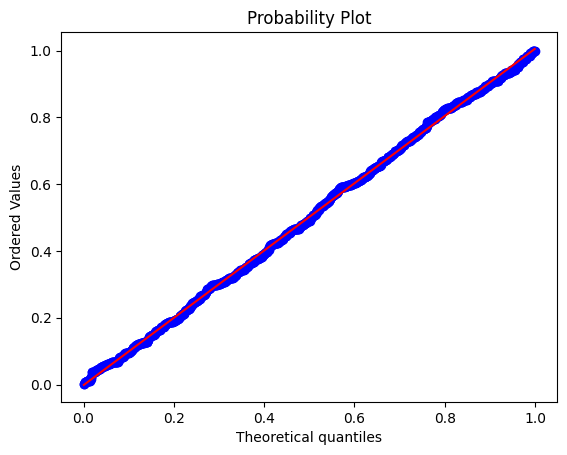

In [ ]:
stats.probplot(tt['p-value'], dist="uniform", plot=pylab)
pylab.show()

---

<font color='teal'>Проверим возможность проведения т-теста для второго датасета. Данные распределены ненормально согласно гистограмме. Необходимо проверить, будет ли нормально распределено выборочное среднее.

In [ ]:
# применяем bootstrap
n = 1000
result = []
for i in range(n):
    mean = df_2['amount'].sample(frac=1,replace=True,random_state=i).mean()
    result.append(mean)

In [ ]:
t_2 = pd.DataFrame({'sample_mean':result})

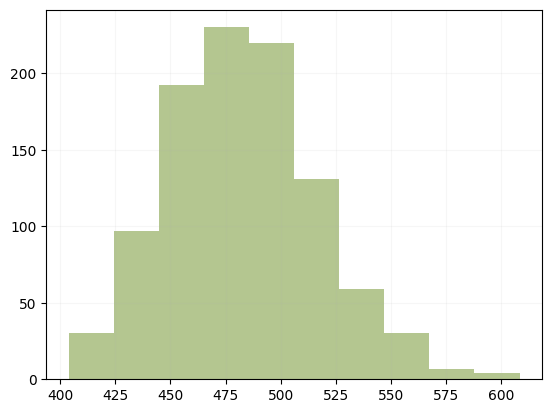

In [ ]:
# распределение выборочных средних
plt.figure()

t_2['sample_mean'].hist(color='olivedrab', alpha=0.5)

plt.grid(alpha=0.1)
plt.show()

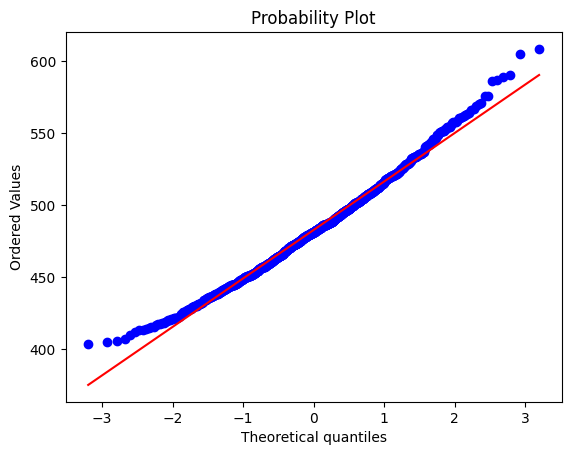

In [ ]:
stats.probplot(t_2['sample_mean'], dist="norm", plot=pylab)
pylab.show()

<font color='teal'>Гистограмма распределения выборочного среднего для второго датасета напоминает по форме график нормального распределения, но, тем не менее, график все-таки видимо сдвинут слево, чтобы утверждать о нормальном распределении и проводить т-тест. QQ-plot также говорит не в пользу нормального распределения выборочного среднего - данные искажены относительно прямой. Соответсвенно, принимаем решение против проведения т-теста в данному случае.</font>

---

<font color='teal'>Третий датасет не содержит количественных данных (только категориальные и даты), поэтому кажется релевантным подобрать альтернативный вариант, т.к. т-тест не сможет дать адекватный результат.</font>

###<font color='purple'>*К какому дата сету вы бы могли применить z-тест?*</font>

<font color='teal'>Z-тест может применяться для бинарной классификации. Если преобразовать данные в третьем датасете, то, погалаю, может появиться возможность проведения z-теста для этого датасета.</font>

<font color='teal'>Например, можно с помощью one-hot encoding преобразовать данные из столбца `time_come` в 0 для отсутствия повторного входа и 1 для наличия повторного входа и посмотреть retention rate. Новая фича может быть направлена на улучшение показателя сохраняемости пользователей. Также можно, наверное, разделить выборки на пользователей android и ios и сравнить показатель renetion rate между такими двумя выборками. Возможно, если в одной выборке метрика преобладает над показателями в другой, то это сигнализирует о том, что, например, приложение для устройств с худшим показателем метрики требуется в улучшении интерфейса и т.д.</font>

<font color='grey'>(Но это не точно, но мне на данном этапе так видится)</font>

###<font color='purple'>*К какому вы бы не стали применять t-test и z-test?*</font>

<font color='teal'>Кажется, что ко второму датасету не следует применять t-тест или z-тест - для z-теста нет бинарной классификации, для t-теста "провалена" проверка на нормальное распределение выборочного среднего и заметны выбросы.</font>

<font color='teal'>Также, возможно, для третьего датасета в том виде, в котором он существует, следует применить альтернативный тест, т.к. в нем не содержится количественных данных в принципе, и сделать выбор в пользу, например, теста Манна-Уитни.</font>

<font color='grey'>(И это снова не точно, но мне на данном этапе так видится)</font>